In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import trainMultiLayer, runMultiLayer

plt.rcParams['figure.facecolor']='white'

In [2]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 3; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [3]:
# Select a subset of the training samples
numBins = 2                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = XBins[0]
DTrain = DBins[0]
LTrain = LBins[0]
XTest  = XBins[1]
DTest  = DBins[1]
LTest  = LBins[1]


In [4]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data
XTrain  = np.c_[ XTrain, np.ones(XTrain.shape[0]) ] 

# The test data
XTest = np.c_[ XTest, np.ones(XTest.shape[0]) ] 


In [5]:
## Weights for data set 3
# xavier weight initialization
import numpy as np
from math import sqrt
from numpy import mean
from numpy.random import rand

# number of nodes in the previous layer
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
weights_1= scaled[0:12]
weights_2 = scaled[12:24]
W0_dataSet3 = np.reshape(weights_1 , (3,4))
V0_dataSet3 = np.reshape(weights_2 , (4,3))

In [68]:
# Train your multi layer network
# Note: You need to modify trainMultiLayer() and runMultiLayer() in classifiers.py in order to train the network

numHidden = 0      # Change this, number of hidden neurons
numIterations = 100000   # Change this, number of iterations (epochs)
learningRate  = 0.0001  # Change this, your learning rate
W0 = np.random.rand(len(XTrain[1]),XTrain.shape[1] +1) / 100  # Initialize your weight matrix W
V0 = np.random.rand(len(XTrain[1]) +1 ,DTrain.shape[1])  / 100          # Initialize your weight matrix V


# Run training loop
W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

array([0.88283822])

Text(0, 0.5, 'Error')

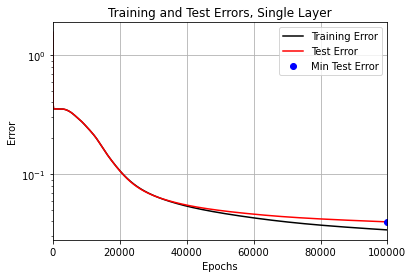

In [11]:
# Plot errors
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Single Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [12]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

YPredTrain, LPredTrain, HPredTrain = runMultiLayer(XTrain, W, V)
YPredTest, LPredTest , HPredTest = runMultiLayer(XTest , W, V)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[277.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 267.   1.   0.   0.   0.   0.   1.   3.   5.]
 [  0.   1. 270.   2.   0.   0.   1.   1.   2.   0.]
 [  0.   0.   3. 260.   0.   5.   0.   0.   2.   7.]
 [  0.   0.   0.   0. 270.   0.   1.   1.   2.   3.]
 [  0.   0.   1.   0.   0. 274.   0.   0.   0.   2.]
 [  0.   2.   1.   0.   1.   0. 273.   0.   0.   0.]
 [  0.   0.   0.   1.   2.   3.   0. 268.   1.   2.]
 [  0.  10.   1.   0.   2.   0.   0.   0. 261.   3.]
 [  0.   4.   0.   1.   2.   2.   0.   1.   1. 266.]]
Accuracy: 0.9697


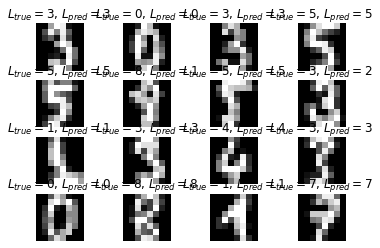

In [13]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'multi', [W, V], [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)

In [61]:
### Create a non-generalizable solution
idx = np.random.randint(len(XTrain), size=15)

XTrain_test = XTrain[idx , :]

DTrain_test = DTrain[idx , :]

LTrain_test = LTrain[idx ]

(15,)

In [70]:
# Train the model on the new sample
W_test, V_test, ErrTrain_test, ErrTest_test = trainMultiLayer(XTrain_test, DTrain_test, XTest, DTest ,W0, V0, numIterations, learningRate)

n : 0
n : 1000
n : 2000
n : 3000
n : 4000
n : 5000
n : 6000
n : 7000
n : 8000
n : 9000
n : 10000
n : 11000
n : 12000
n : 13000
n : 14000
n : 15000
n : 16000
n : 17000
n : 18000
n : 19000
n : 20000
n : 21000
n : 22000
n : 23000
n : 24000
n : 25000
n : 26000
n : 27000
n : 28000
n : 29000
n : 30000
n : 31000
n : 32000
n : 33000
n : 34000
n : 35000
n : 36000
n : 37000
n : 38000
n : 39000
n : 40000
n : 41000
n : 42000
n : 43000
n : 44000
n : 45000
n : 46000
n : 47000
n : 48000
n : 49000
n : 50000
n : 51000
n : 52000
n : 53000
n : 54000
n : 55000
n : 56000
n : 57000
n : 58000
n : 59000
n : 60000
n : 61000
n : 62000
n : 63000
n : 64000
n : 65000
n : 66000
n : 67000
n : 68000
n : 69000
n : 70000
n : 71000
n : 72000
n : 73000
n : 74000
n : 75000
n : 76000
n : 77000
n : 78000
n : 79000
n : 80000
n : 81000
n : 82000
n : 83000
n : 84000
n : 85000
n : 86000
n : 87000
n : 88000
n : 89000
n : 90000
n : 91000
n : 92000
n : 93000
n : 94000
n : 95000
n : 96000
n : 97000
n : 98000
n : 99000


Text(0, 0.5, 'Error')

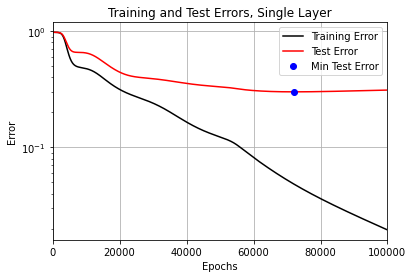

In [71]:
# Plot errors for the training
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest_test = ErrTest_test.min()
minErrTestInd_test = ErrTest_test.argmin()

plt.figure()

plt.semilogy(ErrTrain_test, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest_test, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd_test, minErrTest_test, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Single Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')

In [72]:
#W_test, V_test, ErrTrain_test, ErrTest_test = trainMultiLayer(XTrain_test, DTrain_test, XTest, DTest ,W0, V0, numIterations, learningRate)

# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

YPredTrain_test, LPredTrain_test, HPredTrain_test = runMultiLayer(XTrain_test, W_test, V_test)
YPredTest_test, LPredTest_test , HPredTest_test = runMultiLayer(XTest , W_test, V_test)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest_test, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[309.   8.  16.]
 [110. 223.   0.]
 [  0.   1. 332.]]
Accuracy: 0.8649


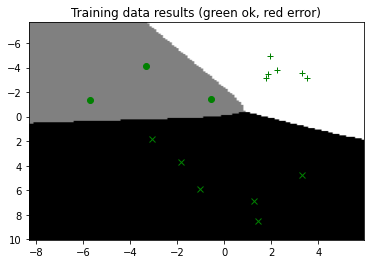

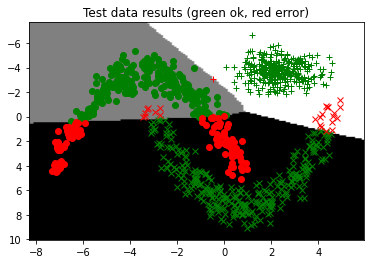

In [73]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain_test, LTrain_test, LPredTrain_test, XTest, LTest, LPredTest_test, 'multi', [W_test, V_test], [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)